## Final Project Submission

Please fill out:
* Student name: Nahum Odemba 
* Student pace: Full Time
* Scheduled project review date/time: October 1, 2022 
* Instructor name: Antonny Muiko
* Blog post URL:


# Business Understanding

* King County is located in the U.S state of Washington.
* King is the most populous county in Washington state.
* Like many Americans, real estate represents a huge portion of the residents’ wealth.
* House prices in the county are determined by different features such as the floor size, number of bedrooms,      bathrooms, view, and waterfront.
* It can be challenging for a home buyer or seller to decide on or predict the price for the house.
* The project's objective, therefore, is to conduct linear regression to predict the prices of houses sold in King County based on such factors as the size of the house, number of bedrooms and bathrooms, view, and waterfront.
* Price will be the dependent variable or the target.
* Ultimately, the project aims to develop a model that can best predict the prices at which a house should be sold in the county to maximize the profit.
* Stakeholders for the project include home sellers and builders.
* The project is important because it is vital to understand the factors that hugely affect the prices of houses in the county. 
* We are lucky that some of the resources have already been provided for these project:
 * They include dataset ``kc_house_data.csv`` from where we will do data understanding and prepartion.


# Data Understanding
* Data understanding is a vital stage in any data cience project
* It is in this stage that I will load, describe, explore, and verify the quuality of data we have in ``kc_house_data.csv``

## Importing Libraries
 * Before I load my data, I will import different libaries.

In [2]:
#Data Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

#Import Numpy and the Pandas Package
import numpy as np
import pandas as pd

#Import StatsModel
import scipy.stats as stats
import statsmodels.api as sm

#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
# Pandas imported as an alias pd is the libabry that I will use to load my dataset into a dataframe
# After that, I will check the first five columns of my dataframe
# checking the first five columns is important to give us a summary of how our columns look like

data = pd.read_csv(r"/Users/user/Documents/Flatiron/Phase_1/dsc-phase-2-project-v2-3/data/kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Checking Data Quality

In [4]:
# Using the .info() is the best way to understand your dataframe
# This way, we can understand the datatypes of every column, see how many rows and columns are there, 
# and see whether there are missing values

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
# Another important step in data understanding is checking for null values
# Checking for null values is important because the presence of null values in 
# a dataset affects the accuracy of the linear regression model

data.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [6]:
# Checking for correlation helps us undersatand the strength and direction of linear regression 
# between the target variable and the dependent variable
# When conducting linear regression, it is always invaluable to first check for correlation between variables

data.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.129599
floors           0.256804
lat              0.306692
bedrooms         0.308787
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

### Checking for outliers

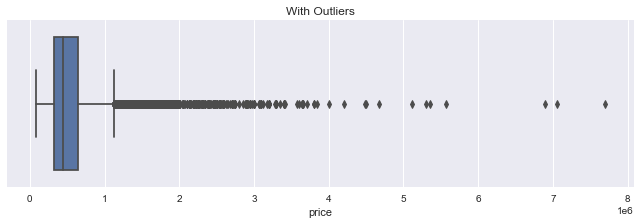

In [7]:
# An outlier is an obervation that lies in an abnormal distance from other values
# Outliers affect the data quality and hence the accuracy of the final model
# Checking for ouutliers is, therefore, vital before proceeding to the next step in the project
# In this case, we check for the outliers using a box plot

sns.catplot(x='price', data=data, kind='box', height=3, aspect=3).set(title="With Outliers");

### Data Quality Report
* A data quality report is simply findings from the data understanding stage.
* This report will guide our data preparation stage:
* The following are the findings from the data understanding stage:
 * Our data set contains 21597 entries and 20 columns
 * Waterfront, view, and year-renovated are the only columns with missing values
 * Also, they (Waterfront, view, and year-renovated) are the only clomuns with NaN values
 * The following variables had a strong positive correlation with price:
       * sqft_living, sqft_above, sqft_living15, and bathrooms
 * Outliers were noticed in the price variable
   

# Data Preparation
* Data preparation is a step that must never be ignored or done improperly
* It is in this stage of the project that I will decide on what columns (variables) I am going to use
* The step involves cleaning and constructing data accordingly
* In this project, I will use the data quuality report generated from the data understanding stage to see where to clean or cunstruct.

### Dropping Columns with the weak correlation to the target variable

In [8]:
# The correlation info will help us decide which variables have a weak correlation with price
# I will drop the zipcode, id, long, lat, yr-built, sqft_lot15, sqft_lot, yr_renovated 
# columns because they have very weak correlation with price 
# I will set inplace to True to ensure that all the drops columns do not reappear

data.drop(['id','lat','yr_built', 'long','yr_renovated', 'zipcode', 
         'sqft_lot15', 'sqft_lot'], axis = 1, inplace = True)

In [9]:
# Confirming if the chosen columns have dropped

data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15
0,10/13/2014,221900.0,3,1.00,1180,1.0,NaN,NONE,Average,7 Average,1180,0.0,1340
1,12/9/2014,538000.0,3,2.25,2570,2.0,NO,NONE,Average,7 Average,2170,400.0,1690
2,2/25/2015,180000.0,2,1.00,770,1.0,NO,NONE,Average,6 Low Average,770,0.0,2720
3,12/9/2014,604000.0,4,3.00,1960,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1360
4,2/18/2015,510000.0,3,2.00,1680,1.0,NO,NONE,Average,8 Good,1680,0.0,1800


### Dealing with null values 
* Null values can take different forms.
* They can either appear as NaN, Null, '0', or '?'
* Null values compromise the quality of the model
* A model with null values is not dependable

In [10]:
# In this project I will drop all the rows with null values. 
# I have chosen to drop them and not replace because, for waterfront, view, and year-renovated, 
# for example, it is inapplicable to use the median or mean, to replace the null values

data.dropna(axis=0, subset = ['waterfront', 'view'], inplace = True)



In [11]:
# Confirming whether there are no more NaN values

data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
sqft_living15    0
dtype: int64

In [12]:
# I then use .info to confirm that all columns do not have missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19164 entries, 1 to 21596
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19164 non-null  object 
 1   price          19164 non-null  float64
 2   bedrooms       19164 non-null  int64  
 3   bathrooms      19164 non-null  float64
 4   sqft_living    19164 non-null  int64  
 5   floors         19164 non-null  float64
 6   waterfront     19164 non-null  object 
 7   view           19164 non-null  object 
 8   condition      19164 non-null  object 
 9   grade          19164 non-null  object 
 10  sqft_above     19164 non-null  int64  
 11  sqft_basement  19164 non-null  object 
 12  sqft_living15  19164 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 2.0+ MB


### Dealing with Outliers
* An outlier is an obervation that lies in an abnormal distance from other values
* Outliers affect the data quality and hence the accuracy of the final model
* You can deal with the outliers by removing them to improve the quality of the model

In [13]:
#I chose to use Interquartile Range (IRQ) to remove the outliers

Q75 = np.percentile(data['price'],75)
Q25 = np.percentile(data['price'],25)
IQR = Q75-Q25
cutoff = IQR * 1.5
upper = Q75 + cutoff
lower = 1

df = data[(data['price']<upper)]
df.head()


,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15
1,12/9/2014,538000.0,3,2.25,2570,2.0,NO,NONE,Average,7 Average,2170,400.0,1690
2,2/25/2015,180000.0,2,1.00,770,1.0,NO,NONE,Average,6 Low Average,770,0.0,2720
3,12/9/2014,604000.0,4,3.00,1960,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1360
4,2/18/2015,510000.0,3,2.00,1680,1.0,NO,NONE,Average,8 Good,1680,0.0,1800
6,6/27/2014,257500.0,3,2.25,1715,2.0,NO,NONE,Average,7 Average,1715,?,2238


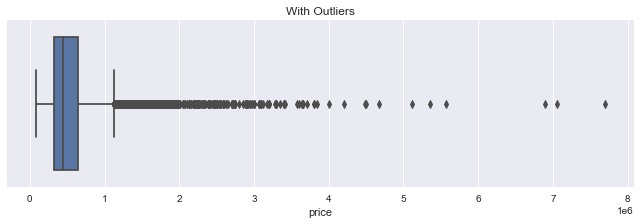

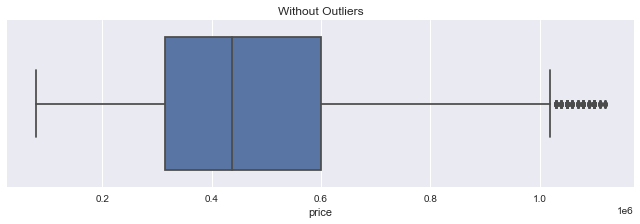

In [14]:
# Let me compare the box plots of with and without outliers
# I will plot a box plot without the outliers
# And from what we can see now, the box plot looks great

sns.catplot(x='price', data=data, kind='box', height=3, aspect=3).set(title="With Outliers");
sns.catplot(x='price', data=df, kind='box', height=3, aspect=3).set(title='Without Outliers');

### Checking for Skeweness
* Removing outliers is a good way to normalizse the skewness of our graph
* We assume that by removing the outliers then the graph will take a shape the look like a normal distribution

4.081094881163346


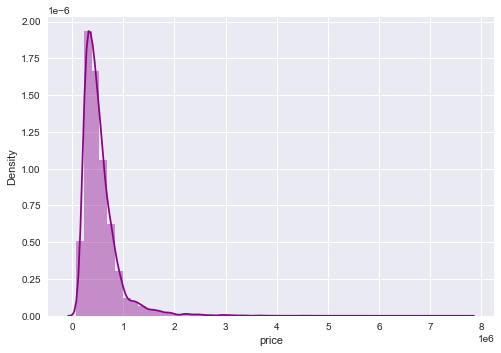

In [15]:
# Let us check the skewness of the graph before removing the outliers

sns.distplot(data.price, color='darkmagenta')
print(data['price'].skew())

0.7445994250634018


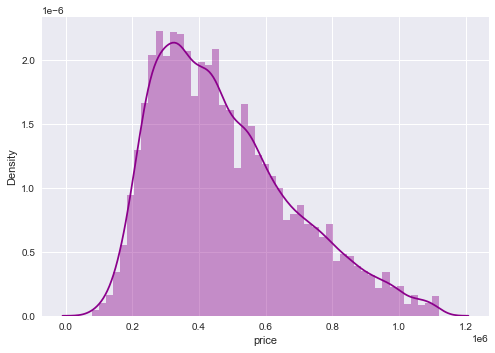

In [16]:
# Now let use see the skewness after dealing with the outliers
# Notice the differences?

sns.distplot(df.price, color='darkmagenta') 

print(df['price'].skew())

### Handling Non-Numeric/Categorical Variables
* Non-numeric or categorical data is a great way to understand our data but not the best when it comes to linear regression
* Categorical variables will cause problems to the regression model if not transformed further
* Some of the categorical data in our dataset include condition, view, waterfront, and grade
 
#### Use One-Hot Coding with Pandas
* One-hot encoding is a great way to transform categorical variable in a model
* I will use one-hot coding to create multiple dummy varriables for each category of ``condition`` and ``grade`` variable
* I will use the pandas' ``get_dummies`` method in this approach


In [17]:
# Let us first check the value counts for the condition variable

df['condition'].value_counts()

Average      11766
Good          4800
Very Good     1377
Fair           150
Poor            24
Name: condition, dtype: int64

In [18]:
# We will also do this with the grade column because it will also be useful for our model

df['grade'].value_counts()

7 Average        7938
8 Good           5290
9 Better         2037
6 Low Average    1803
10 Very Good      679
5 Fair            212
11 Excellent      128
4 Low              25
12 Luxury           4
3 Poor              1
Name: grade, dtype: int64

In [19]:
# Making a copy of the categorical variables to prepare them for one-hot encoding
copies_df = df[["condition", "grade"]].copy()
copies_df.sample(10, random_state=1)

,condition,grade
3338,Average,7 Average
15366,Average,7 Average
17746,Average,7 Average
5542,Average,7 Average
20600,Average,8 Good
8474,Good,8 Good
20165,Average,9 Better
3125,Good,8 Good
14731,Average,8 Good
17228,Average,9 Better


In [20]:
# Pandas' get_dummies offers a quick way to perform one-hot encoding 
# and return the dummy varriable to our dataframe 
# However, as you can notice, the original variable (condition) has been dropped and dummy variables added

pd.get_dummies(df, columns=["condition", "grade"]).head()


,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,...,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,12/9/2014,538000.0,3,2.25,2570,2.0,NO,NONE,2170,400.0,...,0,0,0,0,0,0,0,1,0,0
2,2/25/2015,180000.0,2,1.00,770,1.0,NO,NONE,770,0.0,...,0,0,0,0,0,0,1,0,0,0
3,12/9/2014,604000.0,4,3.00,1960,1.0,NO,NONE,1050,910.0,...,0,0,0,0,0,0,0,1,0,0
4,2/18/2015,510000.0,3,2.00,1680,1.0,NO,NONE,1680,0.0,...,0,0,0,0,0,0,0,0,1,0
6,6/27/2014,257500.0,3,2.25,1715,2.0,NO,NONE,1715,?,...,0,0,0,0,0,0,0,1,0,0


### Avoiding the Dummy Varriable Trap
* Perfect multicollinearity is a problem when dealing with dummy varriables
* Perfect multicollinearity is when you are able to predict one variable from all the other
* One-hot ecoding dummy variables suffer from this problem
* Multicollinearity is a huge problem in regression modeling
* We set drop_first to True to avoid this problem

In [21]:
# Eliminating perfect multicollinearity
pd.get_dummies(df, columns=["condition", "grade"], drop_first = True).head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,...,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,12/9/2014,538000.0,3,2.25,2570,2.0,NO,NONE,2170,400.0,...,0,0,0,0,0,0,0,1,0,0
2,2/25/2015,180000.0,2,1.00,770,1.0,NO,NONE,770,0.0,...,0,0,0,0,0,0,1,0,0,0
3,12/9/2014,604000.0,4,3.00,1960,1.0,NO,NONE,1050,910.0,...,1,0,0,0,0,0,0,1,0,0
4,2/18/2015,510000.0,3,2.00,1680,1.0,NO,NONE,1680,0.0,...,0,0,0,0,0,0,0,0,1,0
6,6/27/2014,257500.0,3,2.25,1715,2.0,NO,NONE,1715,?,...,0,0,0,0,0,0,0,1,0,0


# Modeling

### Simple Linear Regression Model

* Statistical modeling uses data along with statistics to provide a framework for understanding data relationships between variables
* I will start by a simple liear regression model that will provide a formula with which a house seller can use to predict the ``price`` of a house given ``sqft_living``  
* This statistical model will explain the relationship between ``price`` which in this case is the dependent variable and ``sqft_living``, the independent variable

Our model will build on the mathematical equation for a straight line:
$$y = m  x + c$$ 

In statistical models, this equation can further be expressed as:
$$y = \beta_0 + \beta_1  x $$ 

Where:

$y =$ the dependent variable we want to predict ``price``

$\beta_0 =$ the $y$ interecept, or where the line touches the $y$ axis on the graph

$\beta_1 =$ the slope of the line in the graph for our model 

$\beta_0$ and $\beta_1$ will be our model parameters or coefficients 

Our simple statistical model, therefore, will be able to predict $y$ given $x$



### Identifying the Variables and Visualizing their Relationship

* The first step for every statistical model is to identify the dependent and independent variables
* After identifying these variables, the second step is to visualize their relationships
* In my case, I have identfied ``price`` as the dependent varaibale and ``sqft_living`` as the independent of which I want to explore the relationship



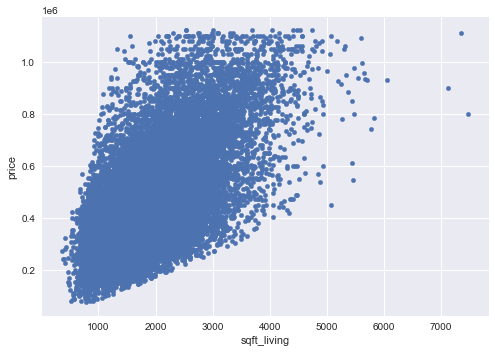

In [22]:
df.plot(x='sqft_living', y='price', kind='scatter');

Based on the plot above we can see that there is a linear but not a perfectly linear relationship between ``price`` and ``sqft_living``.

This means that we can proceed on with our model but be very keen on model loss as this can hugely impact the predicted ``price`` of the house given ``sqft_living``.

### Building the Model

In this case I will use StatsModels to build the first model

StatsModels was chosen because it allows for estimation by ``ordinary least squares`` (OLS) which minimizes residuals

This means that our line of best fit will have the least model loss and hence the best suited to predict the ``price``

In [23]:
# First things first. Import StatsModels

import statsmodels.api as sm

In [24]:
# Next is to find the best values for our model parameters by "fitting" the model
# And then check the model parameters using the summary

y = df["price"]
X = df[["sqft_living"]]

model = sm.OLS(y, sm.add_constant(X)).fit()
model.params



const          147544.167132
sqft_living       166.548479
dtype: float64

These parameters tell us about the relationship between our dependet variable ``price`` and the dependent variable ``sqft_living``.
In other words, my regression model is:

``price`` = 147544.17 + 166.55 * ``sqft_living``

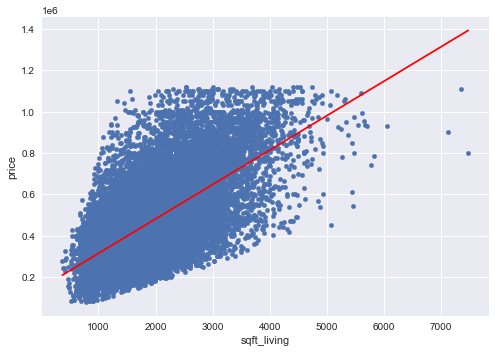

In [25]:
# Let us do some visualization of our regression 

fig, ax = plt.subplots();
df.plot(x="sqft_living", y="price", kind="scatter", ax=ax)

# set up line data representing linear regression model
x = np.linspace(df["sqft_living"].min(), df["sqft_living"].max())
y = x * model.params["sqft_living"] + model.params["const"]

# plot model on the same axes as the data
ax.plot(x, y, color="red");


### The P-Value
* P-value in a T-test is important in testing how likely it is that our data would have occured by random chance
* It is, therefore, usefull in testing the statistical significance of the model
* A p-value less than the $\alpha = 0.05$ means that the model is statisticaly signficant
* A p-value higher than the $\alpha$ shows that the model is not statistically significant and that data used would have occured by random chance

In [26]:
# Finding the p-value of the model

model.pvalues

const          0.0
sqft_living    0.0
dtype: float64

Our model has a ``p-value of 0.0`` this is less than the $\alpha$ = ``0.05`` meaning that it is statistically significant and that our data has no likelihood of occuring by a random chance

In [27]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                 1.143e+04
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:14:16   Log-Likelihood:            -2.4306e+05
No. Observations:               18117   AIC:                         4.861e+05
Df Residuals:                   18115   BIC:                         4.861e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.475e+05   3304.942     44.643      

### The Coefficient of Determination or the $R^2$

* $R^2$ shows the variation in the dependent variable $y$ as explained by the model
* $R^2$ close to zero(0) or far from one (1) indicates that the model is a poor fit
* In our model $R^2 = 0.387$  
* This means that 38.7% variance in the ``price`` can be explained by the size ``sqft_living``

### Mean Absolute Error
* Mean Absolute Error (MAE) is another excellent metric for guaging the success rate of our model
* This metric calculates the absolute value of each error before adding it to the sum
* It has an advantage over R-Squared, because unlike the $R^2$, its units are in the units of the predicted variable $y$


In [28]:
model.resid.abs()

1         37573.758866
2         95786.496173
3        130020.813491
4         82654.387688
6        175674.809087
             ...      
21591    109277.325019
21592     42363.340421
21593    132271.154255
21594     84677.384009
21596      7576.384009
Length: 18117, dtype: float64

In [29]:
mae = model.resid.abs().sum() / len(y)
mae

47425106.2057116

### Interprating MAE
In this case, our ``MAE is 47425106.21.``

This means that our model is off by ``47425106.21`` dollars in a given prediction.

Our MAE is too large, therefore, there is need for further improvement in the model to accurately predict the price

## Multiple Linear Regression

* Unlike simple linear regression, multiple linear regression uses more than one independent variable in predicting the dependent variable.
* Why do we need multiple linear regression?
* From what we have seen, using a simple linear regression, our model is only capable of explaining 38.7% variance of the target variable. This value is very low.
* Multiple linear regression will help us add more variables into the mix.
* This way, we can be able to include many other factors such as the condition and grade of the house to predict the price of the house.
* The null hypothesis $H_0$ is that: 

   $$R^2_0 = R^2_1$$
   

* The alternative hypothesis in this case is that by increasing more independent variables, the value of $R^2$ will increase, therefore:

   $$R^2_0 < R^2_1$$ 
   
   
* $R^2_0$ is the R-squared using ``sqft_living`` as the only predictor: The value we get in the simple linear regression
* $R^2_1$ is the R-squared using multiple independent variables as the predictors: The value we get in multiple linear regression

In [30]:
# Just like in our simple linear model, we will start our multiple linear regression model by defining X and y 

y = df["price"]
X = df[["sqft_living", 'floors', 'bathrooms', 'sqft_above', 'sqft_living15', 'bedrooms']]
X

,sqft_living,floors,bathrooms,sqft_above,sqft_living15,bedrooms
1,2570,2.0,2.25,2170,1690,3
2,770,1.0,1.00,770,2720,2
3,1960,1.0,3.00,1050,1360,4
4,1680,1.0,2.00,1680,1800,3
6,1715,2.0,2.25,1715,2238,3
...,...,...,...,...,...,...
21591,1310,2.0,2.50,1180,1330,3
21592,1530,3.0,2.50,1530,1530,3
21593,2310,2.0,2.50,2310,1830,4
21594,1020,2.0,0.75,1020,1020,2


In [31]:
#The next step is to fit the defined X and y values using statsmodels to get the best-fit

model_2 = sm.OLS(y, sm.add_constant(X)).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     2224.
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:14:55   Log-Likelihood:            -2.4249e+05
No. Observations:               18117   AIC:                         4.850e+05
Df Residuals:                   18110   BIC:                         4.851e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          8.663e+04   5867.190     14.765

### Inteprating the $R^2$

* Before looking the value of $R^2$ it is worth noting that our P-value for this second model still remains at ``0.00``. This is lower than $\alpha = 0.05$.


* This means that our model is statistically significant and that there is no likelihood that the data used could happen by a random chance.


* R-squared has improved compared to our R-squared in the first simple linear regression model.


* The new $R^2$ is ``0.424`` meaning that unlike the first model which could only explain ``38.7%`` variance in the ``price``, our second model can explain ``42.4%`` variance in ``price``. 


* This is a huge improvement in making our model even more accurate in predicting the ``price`` of houses in King County

In [32]:
# Checking the coefficients

model_2.params

const            86631.789466
sqft_living        167.386786
floors           45739.681636
bathrooms        -6757.728395
sqft_above         -52.815843
sqft_living15       82.572479
bedrooms        -18844.682813
dtype: float64

### Inteprating the Coefficients


* The above parameters offer a lot to learn from the houses ``price`` patterns in King County


* First, the Const parameter shows that the house ``price`` in King county is around ``86631.78`` dollars when all other independent variables are ``zero``


* However, an increase in the ``sqft_living`` by one foot, leads to an increase in the house ``price`` by ``167.39`` dollars.


* ``floors`` have the largest positive impact on the house ``price``. An increase in the ``floors`` by one floor increases the house ``price`` by ``45739.68`` dollars.


* On the negative side, an incrase in the number of ``bathrooms`` by one bathroom leads to a decrease in the house ``price`` by ``6757.73`` dollars.


* ``Bedrooms`` also have a negative impact on ``price``. An increase in the number of ``bedrooms`` by one leads to a decrease in the predicted ``price`` by ``18844.69`` dollars.  

### Finding the Mean Absolute Error for Model Two

* Apart from $R^2$, the mean absolute error is another important metric that we can use in the second model to guage its performance with the first model.


* We assume that with the improvement in the $R^2$ there will be a decrease in MAE meaning that for an increase in the variables, we will be able to predict the ``price`` of houses in King County with lower error than using just one independent variable.

In [33]:
# Let us first check the absolute values of the residuals

model_2.resid.abs()

1         23493.365739
2        220741.145196
3        182360.408344
4        106568.387933
6        230158.590245
             ...      
21591    103541.824842
21592     92051.900428
21593    101604.615320
21594     65661.218864
21596     11439.781136
Length: 18117, dtype: float64

In [34]:
# Calculating the mean absolute error for the second model

mae_2 = model_2.resid.abs().sum() / len(y)
mae_2

125750.67440759364

In [35]:
# Confirming if it is true that there has been an improvement in the MAE value for the secomnd model

mae_2 < mae

True

The code above confirms that indeed it is ``True`` that the second MAE is lower than for the first model.

We can go ahead to say that this second model better predicts the ``price`` of houses in King County than the first.

### The Third Model -- Using Categorical Variables

* Though the second model shows huge improvement from the first, it still has a very low $R^2$


* We need another model that can improve on this;


* In our case, the best approach will be to include categorical variables in the model.


* However, if you can remember, I said that linear regression uses only numeric and not categorical variables


* Also, if you can remember, I used one-hot encoding to transform ``condition`` and ``grade`` variables in a way I can use them for linear regression.


* The assumption in this case is that the ``condition`` and ``grade`` of the houses in King County also have a huge role to play in determining and predicting the ``price``.


* In this third model, I intend to see an improved $R^2$ and MAE

In [40]:
# Let us have a look of the first fie rows of our transformed dataset

pd.get_dummies(df, columns=["condition", "grade"], drop_first = True).head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,sqft_above,sqft_basement,...,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,12/9/2014,538000.0,3,2.25,2570,2.0,NO,NONE,2170,400.0,...,0,0,0,0,0,0,0,1,0,0
2,2/25/2015,180000.0,2,1.00,770,1.0,NO,NONE,770,0.0,...,0,0,0,0,0,0,1,0,0,0
3,12/9/2014,604000.0,4,3.00,1960,1.0,NO,NONE,1050,910.0,...,1,0,0,0,0,0,0,1,0,0
4,2/18/2015,510000.0,3,2.00,1680,1.0,NO,NONE,1680,0.0,...,0,0,0,0,0,0,0,0,1,0
6,6/27/2014,257500.0,3,2.25,1715,2.0,NO,NONE,1715,?,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Define X and y
# This time around notice that we have included condition and grade in the X variables

y = df["price"]
X = df[['sqft_living', 'floors', 'bathrooms', 'sqft_above', 'sqft_living15', 'bedrooms', 'condition', 'grade']]
X

,sqft_living,floors,bathrooms,sqft_above,sqft_living15,bedrooms,condition,grade
1,2570,2.0,2.25,2170,1690,3,Average,7 Average
2,770,1.0,1.00,770,2720,2,Average,6 Low Average
3,1960,1.0,3.00,1050,1360,4,Very Good,7 Average
4,1680,1.0,2.00,1680,1800,3,Average,8 Good
6,1715,2.0,2.25,1715,2238,3,Average,7 Average
...,...,...,...,...,...,...,...,...
21591,1310,2.0,2.50,1180,1330,3,Average,8 Good
21592,1530,3.0,2.50,1530,1530,3,Average,8 Good
21593,2310,2.0,2.50,2310,1830,4,Average,8 Good
21594,1020,2.0,0.75,1020,1020,2,Average,7 Average


In [42]:
X = pd.get_dummies(X, columns=["condition", "grade"], drop_first=True)
X

,sqft_living,floors,bathrooms,sqft_above,sqft_living15,bedrooms,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade_11 Excellent,grade_12 Luxury,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,2570,2.0,2.25,2170,1690,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,770,1.0,1.00,770,2720,2,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1960,1.0,3.00,1050,1360,4,0,0,0,1,0,0,0,0,0,0,1,0,0
4,1680,1.0,2.00,1680,1800,3,0,0,0,0,0,0,0,0,0,0,0,1,0
6,1715,2.0,2.25,1715,2238,3,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,1310,2.0,2.50,1180,1330,3,0,0,0,0,0,0,0,0,0,0,0,1,0
21592,1530,3.0,2.50,1530,1530,3,0,0,0,0,0,0,0,0,0,0,0,1,0
21593,2310,2.0,2.50,2310,1830,4,0,0,0,0,0,0,0,0,0,0,0,1,0
21594,1020,2.0,0.75,1020,1020,2,0,0,0,0,0,0,0,0,0,0,1,0,0


In [43]:
# Let us have a look of the summary of our coefficients

model_3 = sm.OLS(y, sm.add_constant(X)).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     952.0
Date:                Thu, 29 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:16:46   Log-Likelihood:            -2.4122e+05
No. Observations:               18117   AIC:                         4.825e+05
Df Residuals:                   18097   BIC:                         4.826e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4.574e+05   1

In [44]:
model_3.params

const                  457408.642711
sqft_living               129.332655
floors                  33132.585608
bathrooms              -18848.770604
sqft_above                -66.419662
sqft_living15              45.622551
bedrooms                -8767.471782
condition_Fair         -28816.893219
condition_Good          34614.922238
condition_Poor           2937.164951
condition_Very Good     99229.361310
grade_11 Excellent      81311.769955
grade_12 Luxury         34187.540082
grade_3 Poor          -398715.514487
grade_4 Low           -369833.385228
grade_5 Fair          -352624.739571
grade_6 Low Average   -315053.500652
grade_7 Average       -257426.596376
grade_8 Good          -178047.252761
grade_9 Better         -69213.195833
dtype: float64

### Mean Absolute Error for Model Three

In [45]:
model_3.resid.abs()

1         75108.564349
2        131640.356706
3        117474.178020
4         73691.561433
6        150034.120012
             ...      
21591     51069.211316
21592    111394.186799
21593     92253.029000
21594     56819.049379
21596     20281.950621
Length: 18117, dtype: float64

In [46]:
mae_3 = model_3.resid.abs().sum() / len(y)
mae_3

115359.80995913423

In [47]:
mae_3 < mae_2 < mae

True

### Interprating the Results for the Third Model
* First, our third model has a P-Value of ``0.00`` meaning that that the model is statistically signficant.


* Second, with an $R^2$ value of ``0.500`` our third model shows a great improvement from the first and second models.


* This improvement can also be explained further using the mean absolute error which is ``115359.80``. This is a low value compared to our previous two models. 

## Regression Results Summary

### Rationale
* First, I would start by saying that this project chose to use simple linear regression and multiple linear regression for ``price`` prediction because these two approaches provide a simpler and quicker way to understand the relationship between the target and the predictor.


* Second, instead of using graphs to explain these relationships, I chose regression coeffiecients because unlike simple correlation graphs, for example, regression coefficients are able to show both cause and effect.


* Remember the law of correlation which says that correlation is not causation.


* A strong positive correlation between the ``price`` and ``sqft_living``, for example, should not be interprated that a larger ``sqft_living`` causes higher house prices in King County. This is an assumption that could only be proved or disproved using regression and not correlation graph.


* Third, I chose to use StatsModels because it allows for estimation by ordinary least squares (OLS) which minimizes residuals


* This means that our line of best fit will have the least model loss and hence the best suited to predict the price 


* Importantly, this project chose not to solely rely on $R^2$ to determine the quality of our model because of its limitations. These limiations will be discussed under the limitations (see below).


* Instead I chose to use additional metric, the mean absolute error of the model. This metric was chosen because it is more useful in that it directly measures the mean average error.


* The mean average error value, therefore, is a better metric to use in this case compared to $R^2$ which will always increase with the increase in variables.

### Results
* First, all the three models had a p-value of ``0.00`` indicating that they were all statistically signficant compared to the $\alpha = 0.05$


* Results show that the $R^2$ value increased with the increase in variables from 0.387 in baseline model to 0.424 in model two and to 0.500 in model three.


* Model Three that included the two categorical variables alongside independent variables used in model two had the highest $R^2$ value of ``0.500``.


* The mean average error kept on reducing with an increase in the variables. The third model had the lowest mean average error of ``115359.81``.


* This means that, using the third model, our model is off by ``115359.81`` dollars in a given prediction.


* This is slightly lower than using the first model which had an MAE of ``47425106.21`` dollars and second with ``125750.67``.


* These results indicate that if our stakeholders had to use our third model to predict the ``price`` of the houses in King County, they will have to take into account the possibility of going off the mark by ``115359.81`` dollars.


* Of course this means that our model has plenty of room for improvement to reduce this error to the minimum.

### Limitations
* One of the obvious limitations of linear regression modeling approach is that it assumes linearity.


* We assume that our variables have near linear relationship, which from the correlation coefficients, we saw it was not perfect.


* Second, because of how sensitive linear regression is to outliers, we dropped outliers in ``price`` which I cannot predict how much effect this was in developing a model to predict ``price``.


* Finally, we assume that the patterns in the relationship between the target and the predictors will remain the same over some period of time. In other words, our model is not trained to adjust to changes in this relationship.



### Recommendations

* The results of this project are very interesting and uselful in predicting house prices in King County.


* First, it is important to know that the prices of houses in King County are affected by many variables.


* Some of the variables that I found to affect the prices of the house most include the ``grade`` of the house:


* Houses that are graded ``Poor`` lower the prices of houses in King County by ``398715.51`` dollars. 


* On the positive side, however, houses with ``condition--Very Good`` lead to an increase in the ``price`` of houses in King County by ``99229.36`` dollars. 


* Also, though ``sqft_living`` has the strongest positive correlation with our target ``price``, an increase in this variable by one foot leads to an increase in the house ``price`` by only ``129.33`` dollars.


* This means that it is true that correlation is not causation.


* Therefore, when predicting the ``price`` of houses in King County, you should give more emphasis on the ``grade`` and ``condition`` of the house because they are the ones with the largest impacts on the price. 


* Houses that should sell higher are those with conditions very good and above, have two floors and above, and with big sqft_living.